[View in Colaboratory](https://colab.research.google.com/github/VidhyaMadhavi/Assignment2/blob/master/Assignment3_Accuracy_99_dot_2_17612_parameters.ipynb)

# Predicting Handwritten Digits with CNN
#### This Objective of this project is predict the Handwritten Images Correctly.
#### Target accuracy that need to be obtained is 99.2 with Trainable Parameters less than 20000


## Approach Used to Solve the problem
- Used Convolution Layers to extract the features
- Used Dropout to Regularize the model
- Used Maxplooling for feature extraction and dimensionality reduction

#### Importing Libraries

In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, Conv2D
from keras.utils import np_utils
from keras.datasets import mnist

Using TensorFlow backend.


#### Loading Dataset

(60000, 28, 28)


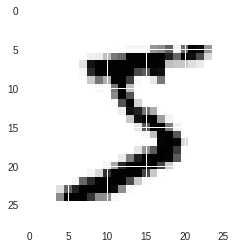

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

#### Data Preprocessing

In [4]:
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

X_train.shape, X_train[0].shape
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

y_train[:10]
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

#### Build Model

In [0]:
from keras.layers import Activation
import keras
model = Sequential()


model.add(Conv2D(16, (3, 3), input_shape=(28, 28, 1)))
model.add(Dropout(0.2))

model.add(Conv2D(24,(3,3), activation='relu' ))
model.add(MaxPooling2D(pool_size = (2,2), strides= 1, padding='same'))

model.add(Conv2D(18, (1,1), activation='relu'))
model.add(Conv2D(16,(1,3), activation='relu' ))
model.add(Conv2D(14,(3,1), activation='relu' ))
model.add(MaxPooling2D(pool_size = (2,2), strides= 2,  padding='same'))

model.add(Conv2D(18, (1,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides= 1,  padding='same'))


model.add(Conv2D(12,(3,3), activation='relu' ))
model.add(Dropout(0.33))

model.add(Convolution2D(10, 9))
model.add(Flatten())
model.add(Activation('softmax'))

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 24)        3480      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 24)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 18)        450       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 22, 16)        880       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 14)        686       
__________

#### Compile Model

In [0]:

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'],
             )

#### Traing Model

In [11]:
model.fit(X_train, Y_train, batch_size=100, epochs=50, shuffle= True, verbose=1, validation_split = 0.20)

score = model.evaluate(X_test, Y_test, verbose=0)
print (score)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 113s 2ms/step - loss: 0.0200 - acc: 0.9932 - val_loss: 0.0312 - val_acc: 0.9909
Epoch 2/50
48000/48000 [==============================] - 112s 2ms/step - loss: 0.0197 - acc: 0.9934 - val_loss: 0.0301 - val_acc: 0.9928
Epoch 3/50
48000/48000 [==============================] - 112s 2ms/step - loss: 0.0202 - acc: 0.9933 - val_loss: 0.0260 - val_acc: 0.9923
Epoch 4/50
48000/48000 [==============================] - 112s 2ms/step - loss: 0.0192 - acc: 0.9937 - val_loss: 0.0289 - val_acc: 0.9918
Epoch 5/50
48000/48000 [==============================] - 111s 2ms/step - loss: 0.0188 - acc: 0.9936 - val_loss: 0.0312 - val_acc: 0.9927
Epoch 6/50
48000/48000 [==============================] - 112s 2ms/step - loss: 0.0187 - acc: 0.9936 - val_loss: 0.0294 - val_acc: 0.9921
Epoch 7/50
48000/48000 [==============================] - 112s 2ms/step - loss: 0.0174 - acc: 0.9945 - val_loss: 0.0280 - 

#### Evaluate Model

In [12]:
score = model.evaluate(X_test, Y_test, verbose=0)
print (score)

[0.03248606431997932, 0.9928]
